<a href="https://colab.research.google.com/github/fiapteamrocket/modelos-ml/blob/master/ExercicioV_KNN_Telco(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo V / Exercicio V - K Nearest Neighbors

## Dados de rotatividade de clientes (churn prediction)

## Introdução

Para esta demo/exercício, utilizaremos dados de rotatividade de clientes (um problema clássico em ML, do inglês churn prediction), da indústria de telecomunicações (telco's). 

O dataset a ser utilizado é parte da iniciativa Intel AI Academy e é chamado 'Orange_Telecom_Churn_Data.csv'.

Carregaremos os dados assim como visto na última aula, realizaremos um pré-processamento e usaremos os K vizinhos mais próximos para prever a rotatividade de clientes com base nas características de cada conta.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Orange_Telco.csv to Orange_Telco.csv
User uploaded file "Orange_Telco.csv" with length 459910 bytes


## Importando nossos Dados

* Começaremos importando os dados. Examinamos então as colunas e os dados importados.

* Observemos então que os dados contêm um estado, código de área (zip code) e número de telefone. 
Você acha que esses são recursos bons o suficiente a serem usados para a criação de um modelo de aprendizagem de máquina? Por que sim ou por que não?

Neste exemplo nós não os utilizaremos, logo, descartaremos esses dados.

In [0]:
import pandas as pd

# Importando nossos dados a partir do arquivo .csv

data = pd.read_csv('Orange_Telco.csv', sep=',')

In [0]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [0]:
# Removendo colunas

data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [0]:
# Verificação das colunas

data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Pré Processamento

* Observe que algumas das colunas são dados categóricos e outras são floats. Esses recursos precisarão ser codificados numericamente usando um dos métodos existentes para tal.

* Finalmente, lembre-se da aula passada onde vimos que para aplicação correta do alg. KNN os dados devem estar em escala. 

* Logo, escalaremos os dados usando um dos métodos de dimensionamento existentes no Scikitlearn.

* No exemplo estaremos, primeiramente, binarizando as colunas 'intl_plan', 'voice_mail_plan' e 'churned'.

Ref. https://scikit-learn.org/stable/modules/preprocessing.html

In [0]:
# Importando nosso binarizador e o utilizando

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [0]:
# Mutando os avisos do sklearn

import warnings
warnings.filterwarnings('ignore', module='sklearn')

# Importando nosso MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # um np.array, nao o dataframe.
                    columns=data.columns)

## Ajuste do modelo

* Agora vamos separar as colunas de recursos (ou seja, tudo exceto nosso "alvo" 'churned') do rótulo ('churned'). 

* Logo, estaremos criando duas tabelas.

* Agora, ajustaremos um modelo de K vizinhos mais próximos com um valor de 'k = 3' a esses dados e vamos predizer o resultado nos mesmos dados.

[Observação] Vimos em aula que, normalmente, os valores de K tendem a ser ímpares. Lembrem-se que o k, no algoritmo KNN, representa o número de vizinhos mais próximos com os quais estamos comparando um determinado ponto de dados. Portanto, não importa se você tem 2 ou n classes, se você escolhe um mesmo k, há um risco de empate na decisão de qual classe você deve definir uma nova instância. É por isso que o valor de k é geralmente ímpar.

In [0]:
# Obtendo uma lista de todas as colunas as quais não contém o rótulo 'churned'

x_cols = [x for x in data.columns if x != 'churned']

# Divindindo os dados em dois dataframes

X_data = data[x_cols]
y_data = data['churned']

# Alternativamente:

# X_data = data.copy()
# y_data = X_data.pop('churned')

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

## Verificação quanto a Acurácia/Matriz de Confusão I

Como visto na aula passada, a Acurácia por si só é simplesmente a porcentagem de rótulos que foram previstos corretamente (verdadeiros ou falsos).

* Vamos então escrever uma função para calcular a precisão usando os rótulos reais e preditos.

* Usando a função, vamos calcular a precisão desse modelo de K vizinho mais próximos em nossos dados.

In [0]:
# Função (accuracy) para calcular a % de valores previstos corretamente

def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_data,y_pred))

[[4263   30]
 [ 259  448]]


In [0]:
print(classification_report(y_data,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      4293
         1.0       0.94      0.63      0.76       707

    accuracy                           0.94      5000
   macro avg       0.94      0.81      0.86      5000
weighted avg       0.94      0.94      0.94      5000



In [0]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_data, y_pred))

0.9422


## Ajuste do Modelo II

No exemplo da célula anterior acabamos nos deparando com um erro muito comum, qual foi?

* Acabamos predizendo e treinando e testando nosso modelo nos mesmos dados.

* Vamos "consertar" o que fizemos anteriormente?


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
y = data.iloc[:,17].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_train, y_train)

pred = knn.predict(X_test)

# Verificação quanto a Acurácia/Matriz de Confusão II

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[1262   29]
 [ 114   95]]


In [0]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1291
         1.0       0.77      0.45      0.57       209

    accuracy                           0.90      1500
   macro avg       0.84      0.72      0.76      1500
weighted avg       0.90      0.90      0.89      1500



In [0]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))

0.9046666666666666


## Desafio

[Desafio V (para sala) / entrega junto aos demais]

Agora é com vocês!

* Ajuste um modelo de K vizinhos mais próximos usando difrentes valores de 'k' ('n_novos vizinhos') variando de 1 a 20.

* Para tanto, use pesos uniformes (o padrão). O coeficiente para a distância de Minkowski ('p') - padrão - pode ser definido como 1 ou 2, apenas seja consistente. 

* Então, armazene a precisão e o valor de 'k' usado em cada um desses ajustes em uma lista ou dicionário.

* Plote (ou veja a tabela de) o 'precisão' vs 'k'. 

* O que você percebe que acontece quando 'k = 1'? Por que você acha que acontece isso?

* Dica: é pelo mesmo motivo já discutido anteriormente em sala.


Ref para resolução: https://scikit-learn.org/stable/modules/neighbors.html

Ref 2 (distancias no sklearn): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html 

[Desafio Bônus - Valendo pontuação extra para as três melhores/soluções mais criativas]

Será que você consegue aplicar o que aprendeu com este desafio de churn prediction, e com o conteúdo das outras aulas, no dataset "HR_Employee_Atrittion" com bons resultados?

In [0]:
# Código escrito pelo estudante 

accuracies = []
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn = knn.fit(X_train, y_train)

  pred = knn.predict(X_test)

  acc =accuracy_score(y_test, pred)

  accuracies.append(acc)

accuracies

[0.882,
 0.886,
 0.9046666666666666,
 0.89,
 0.902,
 0.8926666666666667,
 0.8973333333333333,
 0.89,
 0.896,
 0.89,
 0.8926666666666667,
 0.8906666666666667,
 0.8933333333333333,
 0.8906666666666667,
 0.8926666666666667,
 0.89,
 0.8933333333333333,
 0.8873333333333333,
 0.892,
 0.89]

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

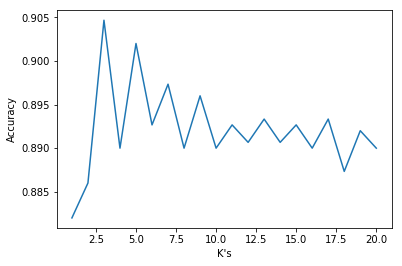

In [0]:
plt.plot(range(1,21), accuracies)
plt.xlabel("K's")
plt.ylabel('Accuracy')

Com o gráfico acima vemos que com apenas um vizinho a acurácia é a menor. Porque, acredito que com um vizinho gera overfit.